In [1]:
!pip install fastbook
!pip install bing-image-downloader
from fastbook import *


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 100.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [3]:
from bing_image_downloader import downloader
# force_replace : (optional, default is False) Delete folder if present and start a fresh download.

downloader.download("White person", limit=130,  output_dir='dataset', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)
downloader.download("Black person", limit=130,  output_dir='dataset', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

[%] Downloading Images to /content/dataset/Black person


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://arts.ufl.edu/site/assets/files/143003/lamyportrait.1840x1328p50x50.png
[%] File Downloaded !

[%] Downloading Image #2 from https://dm0qx8t0i9gc9.cloudfront.net/thumbnails/video/Vd3bj2jPe/videoblocks-closeup-excited-male-person-saying-wow-on-black-background-portrait-of-african-american-man-looking-at-camera-in-studio-emotional-afro-guy-posing-indoors_bbmtozmuv_thumbnail-1080_01.png
[%] File Downloaded !

[%] Downloading Image #3 from https://dm0qx8t0i9gc9.cloudfront.net/thumbnails/video/Vd3bj2jPe/videoblocks-closeup-african-american-man-thinking-on-black-background-portrait-of-curious-afro-male-person-looking-at-camera-in-studio-doubtful-african-guy-getting-an-idea-indoors_ssv9dibdd_thumbnail-1080_01.png
[%] File Downloaded !

[%] Downloading Image #4 from https://townsquare.media/site/85/files/2014/01/post50.jpg?w=1200&amp;h=0&amp;zc

In [7]:
downloader.download("White person", limit=1,  output_dir='.', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

[%] Downloading Images to /content/White person


[!!]Indexing page: 1

[%] Indexed 1 Images on Page 1.


[%] Downloading Image #1 from https://s-i.huffpost.com/gen/1784337/images/o-BROKE-WHITE-PERSON-facebook.jpg
[%] File Downloaded !



[%] Done. Downloaded 1 images.


In [5]:
# broken images break the NN so this is used to discard all broken images
path = Path('dataset')
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#0) []

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


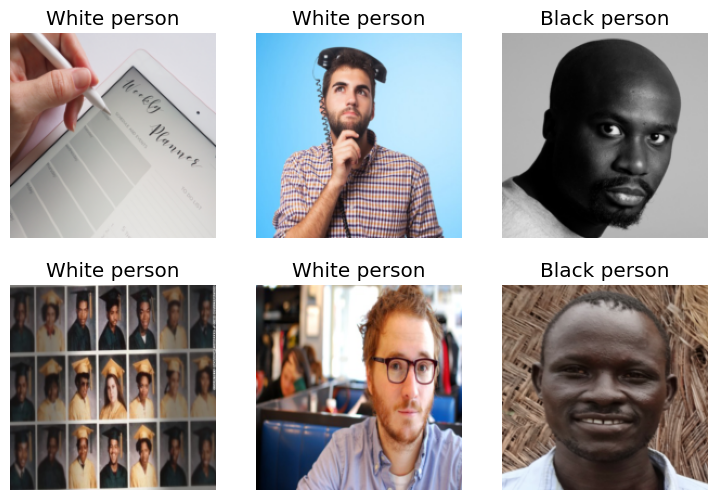

In [6]:
# Data block gives fast ai to give all parameters to create a data vision model dataset
dls = DataBlock(
    blocks = (ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = [Resize(190, method='squish')]
).dataloaders(path)
#data block gives batches of data to ai model
dls.show_batch(max_n=6)

In [8]:
learn = vision_learner(dls, resnet18, metrics=error_rate)



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 178MB/s]


In [9]:
# fine_tune() teach the model the differeces between your model and what it is built for
# adjusts the weights accordingly
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.160233,0.662375,0.272727,00:55


epoch,train_loss,valid_loss,error_rate,time
0,0.691592,0.530748,0.236364,00:54
1,0.691855,0.537580,0.254545,00:57
2,0.555467,0.537450,0.218182,00:56
3,0.448498,0.591822,0.200000,00:55
4,0.377477,0.577141,0.181818,01:03


In [12]:
downloader.download("Black person", limit=2,  output_dir='.', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

[%] Downloading Images to /content/Black person


[!!]Indexing page: 1

[%] Indexed 2 Images on Page 1.


[%] Downloading Image #1 from https://arts.ufl.edu/site/assets/files/143003/lamyportrait.1840x1328p50x50.png
[%] File Downloaded !

[%] Downloading Image #2 from https://dm0qx8t0i9gc9.cloudfront.net/thumbnails/video/Vd3bj2jPe/videoblocks-closeup-excited-male-person-saying-wow-on-black-background-portrait-of-african-american-man-looking-at-camera-in-studio-emotional-afro-guy-posing-indoors_bbmtozmuv_thumbnail-1080_01.png
[%] File Downloaded !



[%] Done. Downloaded 2 images.


In [13]:
is_black,_,probs = learn.predict(PILImage.create('Black.png')) #predict whether it is a person is black or not
print(f'This is a: {is_black}. ')
print(f'Probability it is a black: {probs[0]:.4f}')

is_black,_,probs = learn.predict(PILImage.create('Black3.png')) #predict whether it is a person is black or not
print(f'This is a: {is_black}. ')
print(f'Probability it is a black: {probs[0]:.4f}')

is_black,_,probs = learn.predict(PILImage.create('Black2.png')) #predict whether it is a person is black or not
print(f'This is a: {is_black}. ')
print(f'Probability it is a black: {probs[0]:.4f}')



is_white,_,probs = learn.predict(PILImage.create('White.jpg')) #predict whether it is a person is black or not
print(f'This is a: {is_white}. ')
print(f'Probability it is a white: {probs[0]:.4f}')


This is a: Black person. 
Probability it is a black: 0.9999


This is a: Black person. 
Probability it is a black: 1.0000


This is a: Black person. 
Probability it is a black: 0.9999


This is a: White person. 
Probability it is a white: 0.0000
